# 의사결정나무(Decision Trees)
  - 매우 직관적, 의사결정 규칙을 나무구조로 도표화하여 분류와 예측을 수행하는 분석방법
  - 다른 모델들(신경망, 판별분석, 회귀분석 등)과 다르게 그 과정을 쉽게 이해하고 설명할 수 있음
  - 정보획득(순도의 증가 및 불확실성의 감소)하는 방향으로 학습을 진행
  - 정보함수 : 사건이 발생할 확률과 정보의 가치는 반비례 <br>
  $I(x) = log_{2}{p(x)} $
  - 불순도 지표<br>
    1) 엔트로피(entropy) : 무질서도를 정량화해서 표현한 0~1 값 > 높을수록 그 집단의 특징을 찾기가 어려움 <br>
    $ E(S) = \sum^{d}_{i=1}R_{i}(- \sum p_{k}I(x) )= \sum^{d}_{i=1}R_{i}(- \sum^{m}_{k=1} p_{k} log_{2}{p}_{k})$<br>
    2) 지니계수(gini index)<br> 
    : $ G.I(A) = \sum^{d}_{i=1}(R_{i}(1 - \sum^{m}_{k=1}p^{2}_{ik}))$<br>
    3) 오분류오차(misclassfication error) : 미분이 불가능하여 자주 쓰이지 않음
  - 정보획득량 : 전체 엔트로피 - 분류 후 엔트로피<br>
  $G(S) = E(s) - E(S^{'})$, $E(S^{'})=\sum \frac{S_{a}}{S} E(S_{a})$, S : 모든 사건의 집합 S(a) : 다른 속성을 갖는 경우의 수<br>
  - 의사결정트리를 효과적으로 배치하는데 있어서 가장 중요한 부분은 잎 노드들의 엔트로피 합계를 최소화하는 것
  - 재귀적 분귀(Recursive Partitioning) <br>
  : 첫 분류를 진행 한 뒤에 분류된 대상을 같은 방법으로 또 분류해나가는 방법, 모든 잎의 엔트로피가 0이 될 때 까지 반복하는데 과적합 현상을 방지하기 위해 일정 단계에서 중지하거나 분기를 재조정 해주어야 한다.
  - full tree : 모든 terminal node의 순도가 100%인 상태(과적합 상태)
  - 가지치기(Pruning)<br>
  : 재귀적 분귀를 통해 모든 노드를 분리한 경우는 기존 데이터의 이상치도 정상치인것으로 분류하여 모델은 일반화 되지 못하는 경우가 많다. 그래서 모든 노드를 분리한 뒤 분기를 적절히 합치는 과정을 거쳐 일반화를 해주는것이 가지치기.
    - 가지치기의 정도를 결정하는 방법<br>
    1) 에러감소 프루닝(reduced error pruning)<br>
      : 모든 노드 아래부분을 자르거나 결합한 뒤의 오류와 결합 전의 오류를 비교하여 더 이상 오류가 줄어들기 전까지 반복하는 단순하고 직관적인 방법<br>
    2) 룰 포스트 프루닝(rule post pruning) &nbsp;&nbsp;&nbsp; # 룰 : 루트 노드부터 잎 노트까지의 경로<br>
      : 트리를 모두 룰 형태로 변환 후 각 룰의 정확도를 구하고 정확도가 낮은 순서대로 제거하는 방법<br>
    - 가지치기의 비용함수<br>
      : $CC(T) = Err(T) + \alpha * L(T)$<br>
      CC(T) : 비용 복잡도(오류가 적으면서 terminal node수가 적은 단순한 모델일수록 작은 값)<br>
      Err(T) : 검증 데이터에 대한 오분류율<br>
      L(T) : terminal node의 수(구조의 복잡도)
      $\alpha$ : Rrr(T)와 L(T)를 결합하는 가중치(사용자에 의해 부여됨, 보통 0.01~0.1의 값을 사용)<br><br>
      
  - 장점 : 계산복잡성 대비 높은 예측 성능, 변수 단위로 설명력을 지님<br>
  - 단점 : 결정경계가 데이터 축에 수직이어서 특정 데이터에만 잘 작동함 > 랜덤포레스트로 극복<br>
  - 사용코드<br>
  from sklearn.tree import DecisionTreeClassfier
  dt=DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

### 의사결정나무

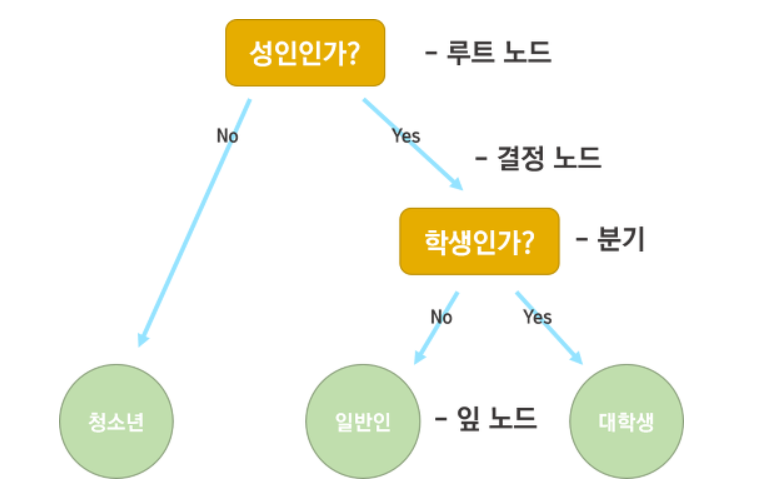

In [1]:
from PIL import Image
im = Image.open('decision_tree.png')
im

### 가지치기

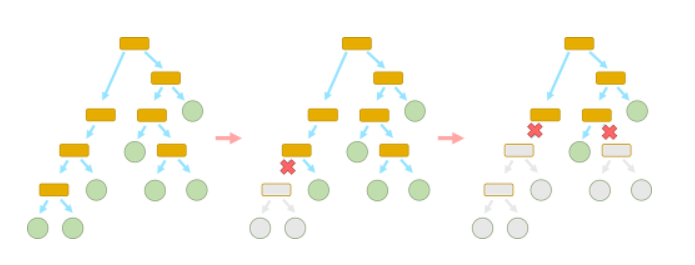

In [2]:
from PIL import Image
im2 = Image.open('pruning.png')
im2

# 랜덤 포레스트(random forest
  - 여러 개의 결정트리(Decision Tree)를 활용한 배깅 방식의 대표적인 알고리즘
  - decision tree의 과적합을 방지하기 위해 고안됨
  - 일부 트리는 overfitting될 수 있지만, 많은 수의 트리를 생성함으로써 큰 영향을 미치지 못 하도록 예방한다
  - 변수 중요도<br>
  : 각 나무의 노드 t에서 속성 Xi를 사용했을 때 도출된 information gain을 가중 평균으로 구해, Xi의 중요성을 도출하는 것이 핵심 아이디어
  - bagging(=bootstrap aggregating)<br>
  : 보팅(Voting)과는 달리 동일한 알고리즘으로 여러 분류기를 만들어 보팅으로 최종 결정하는 알고리즘 <br>
  1) 동일한 알고리즘을 사용하는 일정 수의 분류기 생성<br>
  2)각각의 분류기는 Bootstrapping 방식으로 생성된 샘플데이터를 학습<br>
  3)최종적으로 모든 분류기가 보팅을 통해 예측 결정<br>
  Bootstrapping : 전체 데이터에서 일부 데이터의 중첩을 허용하여 뽑는 방식
  Voting : 
  - bagging_features <br>
  : 모든 속성(feature)들에서 임의로 일부를 선택하고 그 중 정보 획득량이 가장 높은 것을 기준으로 데이터를 분할한다.<br>
   1) 데이터를 제일 처음 분류할 때, 고려할 feature를 임의로 선택(보편적인 선택하는 feature의 수는 $\sqrt{feature 갯수}$ &nbsp;&nbsp;)<br>
   2) 그 중에서 가장 information gain이 높은 feature를 선택하여 데이터를 분류한다.
   - 장점<br>
     1) 예측의 변동성이 줄어 듦<br>
     2) 과적합 방지<br>
     3) 결측치에 강건함<br>
     4) 결측치의 비율이 높아져도 높은 정확도<br>
     5) 변수의 중요성을 파악할 수 있다<br>
   - 단점<br>
     1) 데이터 수가 많아지면 속도가 매우 느려짐<br>
     2) 결과 해석이 어려움<br>
     3) 하이퍼 파라미터가 많아 튜닝을 위힌 시간이 많이 소요됨<br>
   - 사용코드<br>
   from sklearn.ensemble import RandomForestClassifier

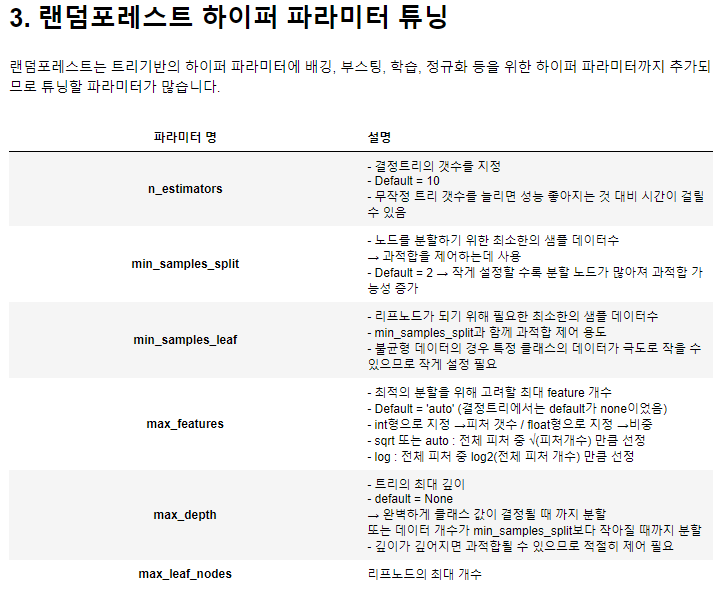

In [1]:
from PIL import Image
im3 = Image.open('random_forest_tuning.png')
im3

# 부스팅(Boosting)
- Boosting 기법은 1990년에 Robert Schapire라는 분이 소개한 방법으로 이 방법을 기반으로 Adaboosting, Gradient boosting과 같은 다양한 방법으로 진보되었습니다. 이 외에도 Logic Boosting, L2Boosting, Binomial Boosting, Spares Boosting등의 기법들이 있습니다.
- Bagging과 유사하게 초기 샘플 데이터를 조작하여 다수의 분류기를 생성하는 기법 중 하나지만 가장 큰 차이는 순차적(Sequential)방법
- bagging의 경우 각각의 분류기들이 학습시에 상호 영향을 주지않고 학습이 끝난 다음 그 결과를 종합하는 기법이었다면, Boosting은 이전 분류기의 학습 결과를 토대로 다음 분류기의 학습 데이터의 샘플가중치를 조정해 학습을 진행하는 방법
- 부스팅 라운드를 진행할수록 m차원 공간의 분류경계선(Borderline)상의 데이터의 가중치가 증가하게 되는 결과를 가져오게 됩니다
- 의사결정나무(Decision Tree)모형을 주로 사용하는 것으로 알려져 있고 과적합(Over fitting)에 강하지만 결과해석이 불가능하다
-

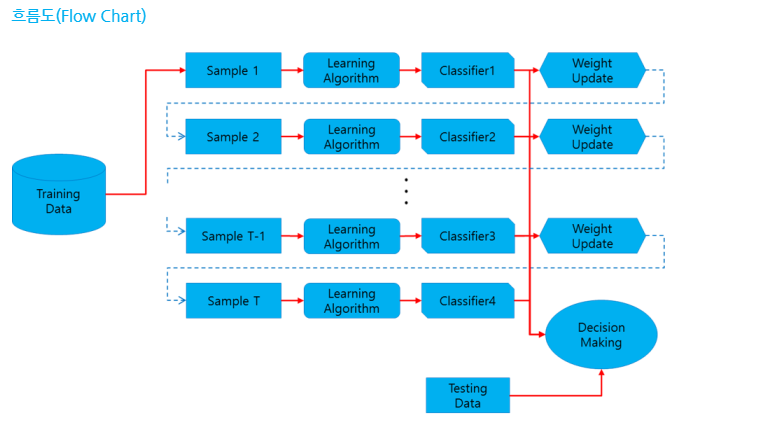

In [4]:
from PIL import Image
im4 = Image.open('boosting_flow.png')
im4

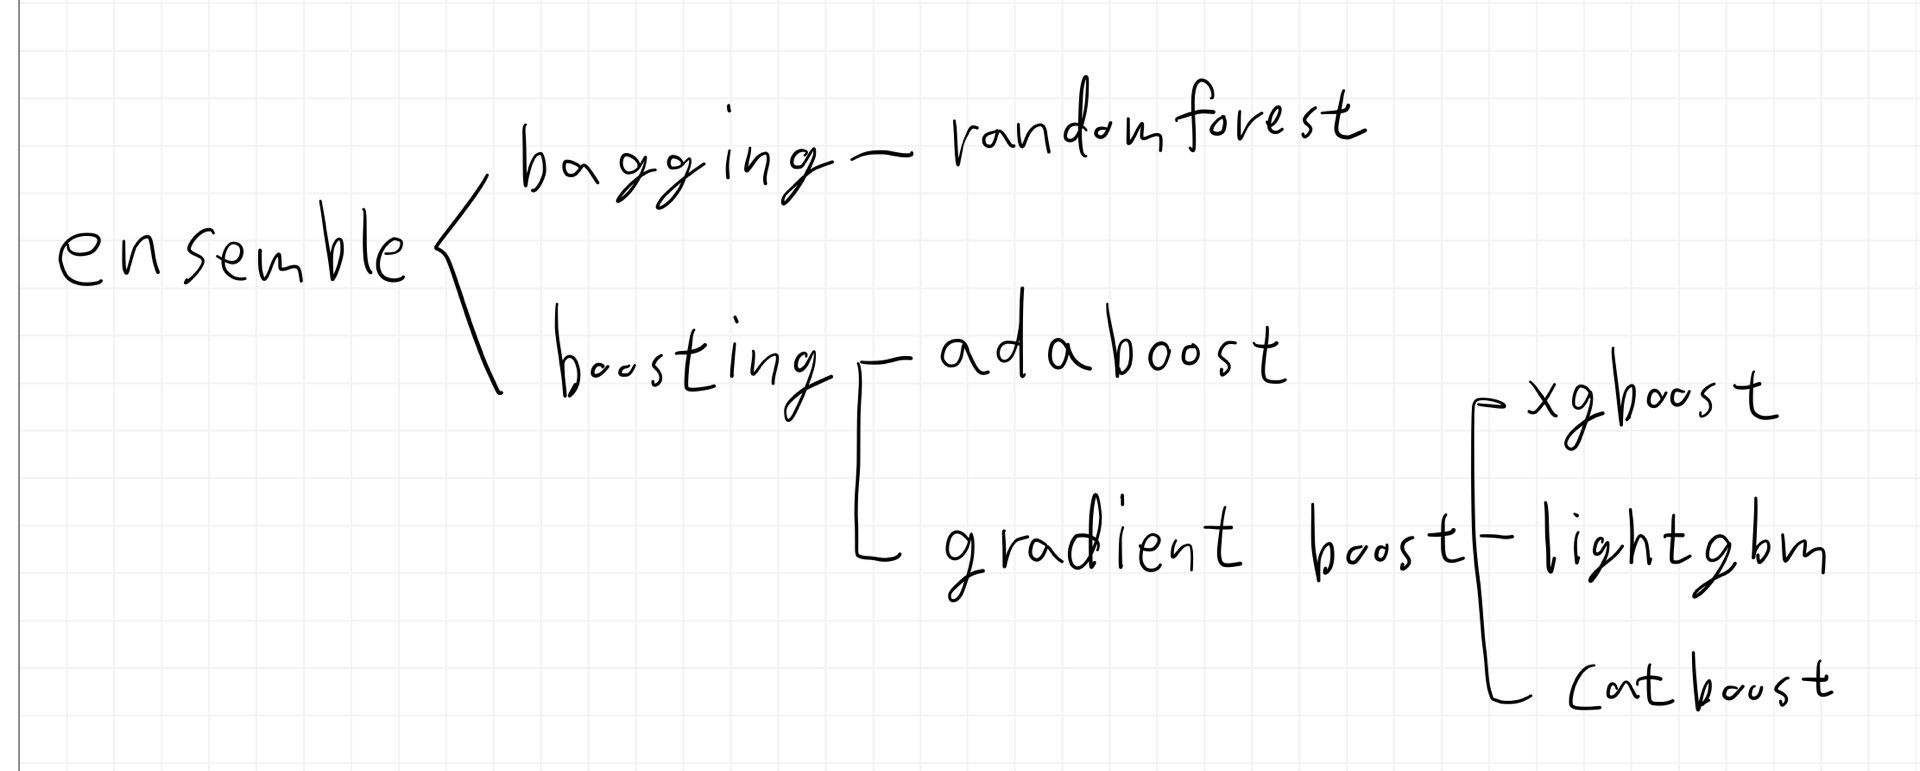

In [2]:
from PIL import Image
im5 = Image.open('ensemble.jpg')
im5

# Adaboost(adaptive boost)
  - stump(decision stumps, 의사결정 단속)로 구성되어 있다. 하나의 stump에서 발생한 error가 다음 stump에 영향을 주는 방식<br>
  - 관측치들에 가중치를 가함으로써 작동하며, 분류하기 어려운 경우에 가중치를 더하고 이미 잘 다뤄진 경우에는 가중치를 덜 함.
  - 새로운 학습기들이 연속적으로 추가되어 더 어려운 패턴에 대한 학습에 집중함
  - 예측은 다중 투표에 의해 만들어지며, 예측들은 각 학습기의 정확도에 의해 가중치가 적용된 것
  - Adaboost 알고리즘의 가장 성공적인 형식은 이진 분류 문제들에 대한 것이고 AdaBoost.M1이라고 불렸다.

# Gradient Boost
  - gradient boosting으로써 AdaBoost의 일반화
  - AdaBoost, 그리고 그와 관련된 알고리즘들은 Bereiman이 ARCing(Adaptive Reweighting + Combining)알고리즘에서 재구성됨
  - Gradient boosting의 작동
  1. 손실함수 최적화
    - 사용된 손실 함수는 문제의 유형에 따라 다름. 손실 함수는 미분가능 해야하며 많은 손실 함수가 지원되고 있음
      - ex) 회귀분석 : Squared error, 분류 : logarithmic
    - 각각의 손실 함수에 의해 도출 될 필요가 없으며, 미분할 수 있는 손실 함수가 사용될 수 있는 일반적인 방법이라는 장점이 있음
  2. 약한 학습기(week learner)
    - 의사결정나무는 gradient boosting에서 약한 학습기로써 사용 됨
    - 특히 회귀 나무를 사용하여 분할에 대한 실제 결과 값을 출력하고 예측에서 잔차를 수정할 수 있음
    - 나무들은 탐욕적 방식으로 만들어지며, 손실을 최소화하거나 Gini같은 순수지표를 기반으로 가장 좋은 분할 지점들을 선택함.
  3. 추가적인 작동법
    - 나무들은 한 번에 하나만 추가되고, 모델 내 기존 나무들은 바뀌지 않음
    - 기울기 하강 절차는 나무가 추가될 때 손실을 최소화하는데 사용 됨
    - 비용을 최적화 하는 분류기의 가중치 조합을 만드는 한 가지 방법은 함수 공간안에서 기울기 하강하는 것
    - 새로운 나무에 대한 결과 값은 모델의 최종 결과를 수정하거나 향상시키기 위해 기존 일련의 나무들의 결과에 추가됨
    - 고정된 수의 트리들은 일단 손실이 수용가능한 수준까지 도달하거나 외부 평가셋에서도 더 이상 향상되지 않으면 추가되거나 훈련을 멈춤
    
  - gradient boosting의 향상<br>
    - 탐욕적 알고리즘이며, 훈련 데이터셋에 빠르게 과적합 될 수 있음<br>
    - 알고리즘의 여러 부분에서 패널티를 주고 일반적으로 감소시킴으로써 성능을 향상시키는 정규화 방법의 이점을 얻을 수 있음<br>
    1. 나무 제한<br>
      1) 나무의 수 : 일반적으로 모델에 더 많은 나무들을 추가하는 것은 과적합 될 수 있음<br>
      2) 나무 깊이 : 더 깊은 나무들은 더 복잡한 나무들이며, 더 짧은 나무들이 선호 됨. 일반적으로 더 좋은 결과들은 4~8 수준에서 관찰됨<br>
      3) 노드 또는 잎의 수 : 깊이 처럼 나무의 크기를 제한 할 수 있지만, 다른 제한들이 사용된다면 대칭 구조로 제한 되지 않음<br>
      4) 분할 별 관측치의 수 : 분할을 고려하기 전에 훈련 노드에서 훈련 데이터의 양에 대한 최소 제한을 부과함<br>
      5) 손실의 최소 향상도 : 추가되는 나무의 모든 분할의 향상에 대한 제한<br>
    2. 가중치(축소(shrinkage) 또는 학습률(learning_rate)) 갱신<br>
      - 각 나무의 예측들은 연속적으로 함께 추가 됨<br>
      - 이 합계에 대한 각 나무의 기여도는 알고리즘에 의한 학습 속도를 늦추기 위해 가중치를 적용할 수 있음<br>
      - 0.1 ~ 0.3 범위의 작은 값 뿐만 아니라 0.1보다 더 작은 값을 가지는 것이 흔함<br>
    3. 확률적 gradient boosting<br>
      - 매 반복마다 훈련 데이터의 하위 샘플이 전체 훈련 데이터셋에서 무작위로(비복원) 뽑혀짐. 그 후, 무작위로 선택된 하위샘플은 기존 학습기에 적합시키기 위해서 전체 샘플 대신 사용 됨<br>
      - 사용될 수 있는 확률적 부스팅의 형태<br>
        1) 각 나무를 만들기 전에 행을 subsampling<br>
        2) 각 나무를 만들기 전에 열을 subsampling<br>
        3) 각 분할을 고려하기 전에 열을 subsampling<br>
        * 사용자 피드백에 따르면, 열 subsampling 사용은 행 subsampling보다 과적합을 더 잘 예방함<br>
    4. 패널티(penalized)받은 gradient boosting<br>
      - 추가적인 제한들은 파라미터화된 나무들에 부과될 수 있음<br>
      - CART와 같은 고전적인 의사결정나무는 약한 학습기로써 사용되지 않음. 대신 잎(터미널) 노드에 수치형 값들을 가지고 있는 회귀 트리라고 불리는 수정된 형태가 사용 됨<br>
      - 나무 잎의 값들은 일부 문서에서 가중치라고도 불림<br>
      - 나무의 잎 가중치 값들은 다음과 같은 유명한 규제 함수들을 사용하여 규제될 수 있음(L1, L2)
  - 사용코드
  from sklearn.ensemble import GradientBoostingClassifier
    - 하이퍼파라미터 : n_estimators : 나무의 갯수, max_depth : 나무의 깊이(복잡도), learning_rate : 학습률
      * gradient boosting은 깊이를 작게하고 나무의 갯수를 늘리는 전략을 많이 취함<br>
      * learning_rate는 이전에 만든 나무의 오류에 기반하여 얼마나 많이 수정해 나갈지의 비율을 의미, 값이 클수록 복잡한 모델을 만듦